In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



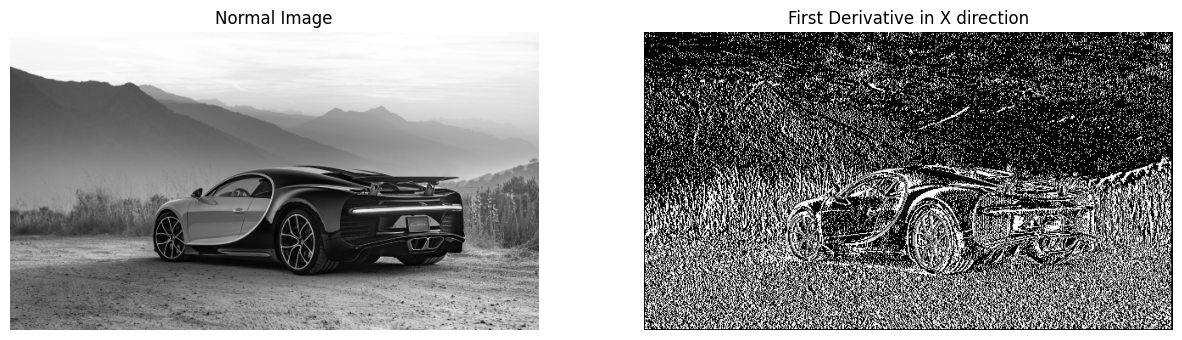

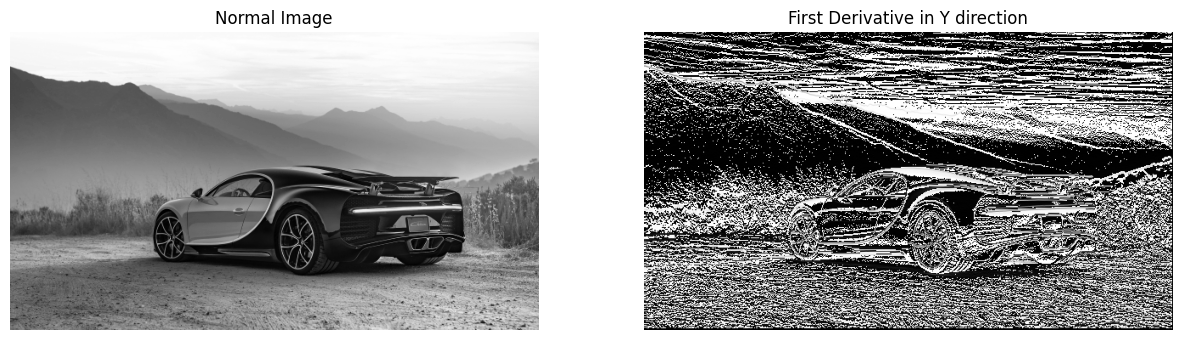

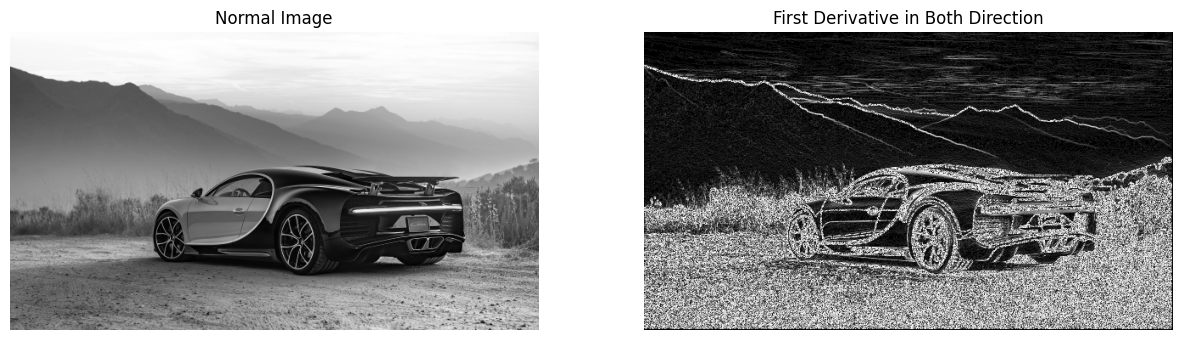

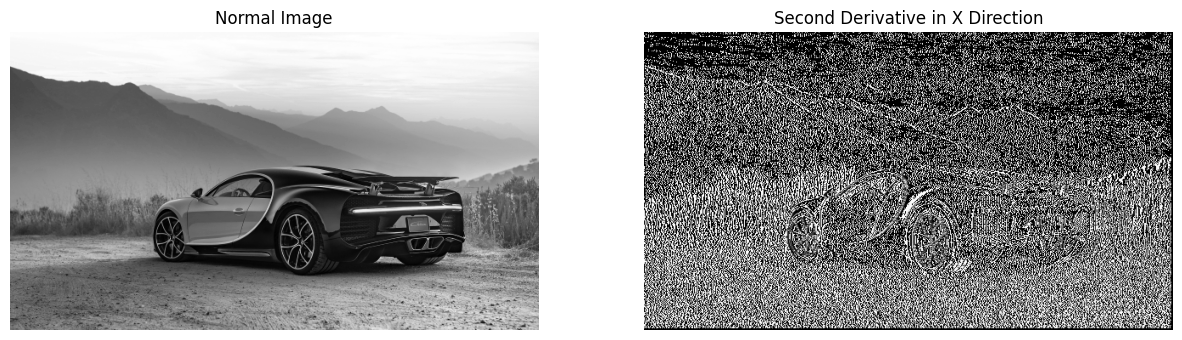

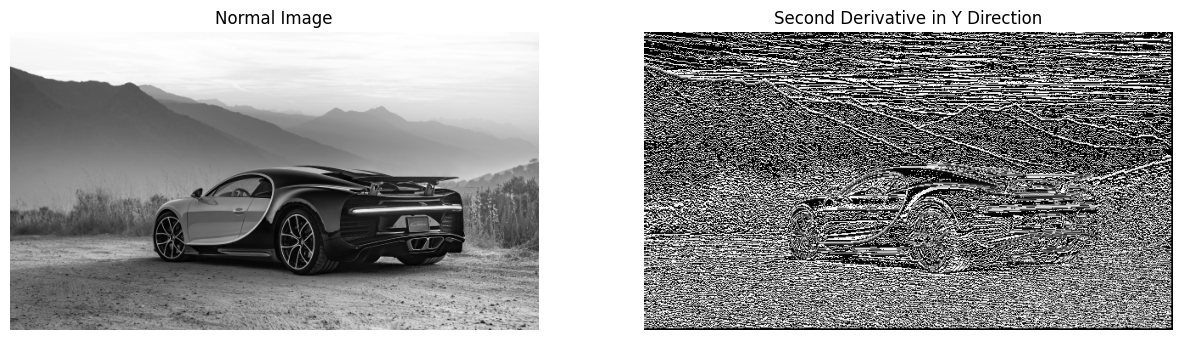

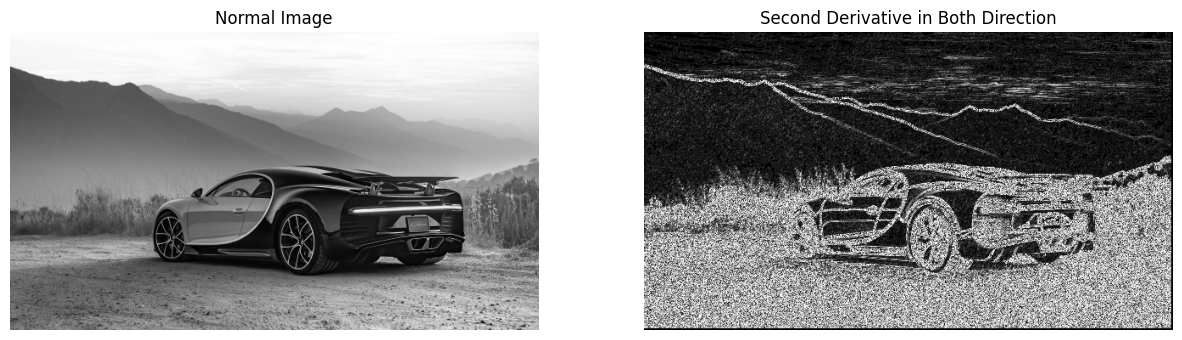

In [23]:
def imageDerivative(img):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    paddedImg = cv.copyMakeBorder(img,1,1,1,1,cv.BORDER_REFLECT)
    height,width = paddedImg.shape[:2]

    firstDerivativeX = np.zeros_like(paddedImg,dtype="uint8") #FirstDerivativeX
    for i in range(height-1):
        for j in range(width-1):
            firstDerivativeX[i,j] = paddedImg[i,j+1] - paddedImg[i,j]
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(firstDerivativeX,cmap="gray")
    plt.axis("off")
    plt.title("First Derivative in X direction")

    firstDerivativeY = np.zeros_like(paddedImg,dtype="uint8") #FirstDerivativeY 
    for i in range(height-1):
        for j in range(width-1):
            firstDerivativeY[i,j] = paddedImg[i+1,j] - paddedImg[i,j]

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(firstDerivativeY,cmap="gray")
    plt.axis("off")
    plt.title("First Derivative in Y direction")
    

    firstDerivativeBothSides = np.zeros_like(paddedImg,dtype="uint8") #FirstDerivativeBothSides ie underoot of sum of squares of both partial derivatives
    for i in range(height-1):
        for j in range(width-1):
            firstDerivativeBothSides[i,j] = np.sqrt(np.square(firstDerivativeX[i,j])+ np.square(firstDerivativeY[i,j])) 
    
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(firstDerivativeBothSides,cmap="gray")
    plt.axis("off")
    plt.title("First Derivative in Both Direction")

    secondDerivativeX = np.zeros_like(paddedImg,dtype="uint8")
    for i in range(height-2):
        for j in range(width-2):
            secondDerivativeX[i,j] = firstDerivativeX[i,j+1] - firstDerivativeX[i,j]
    
        
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(secondDerivativeX,cmap="gray")
    plt.axis("off")
    plt.title("Second Derivative in X Direction")

    secondDerivativeY = np.zeros_like(paddedImg,dtype="uint8")
    for i in range(height-2):
        for j in range(width-2):
            secondDerivativeY[i,j] = firstDerivativeY[i+1,j] - firstDerivativeY[i,j]
    
        
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(secondDerivativeY,cmap="gray")
    plt.axis("off")
    plt.title("Second Derivative in Y Direction")

    
    secondDerivativeBothSides = np.zeros_like(paddedImg,dtype="uint8") #SecondDerivativeBothSides ie underoot of sum of squares of both partial derivatives
    for i in range(height-1):
        for j in range(width-1):
            secondDerivativeBothSides[i,j] = np.sqrt(np.square(secondDerivativeX[i,j])+ np.square(secondDerivativeY[i,j]))

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(secondDerivativeBothSides,cmap="gray")
    plt.axis("off")
    plt.title("Second Derivative in Both Direction")



imageDerivative("Chiron.jpeg")
    




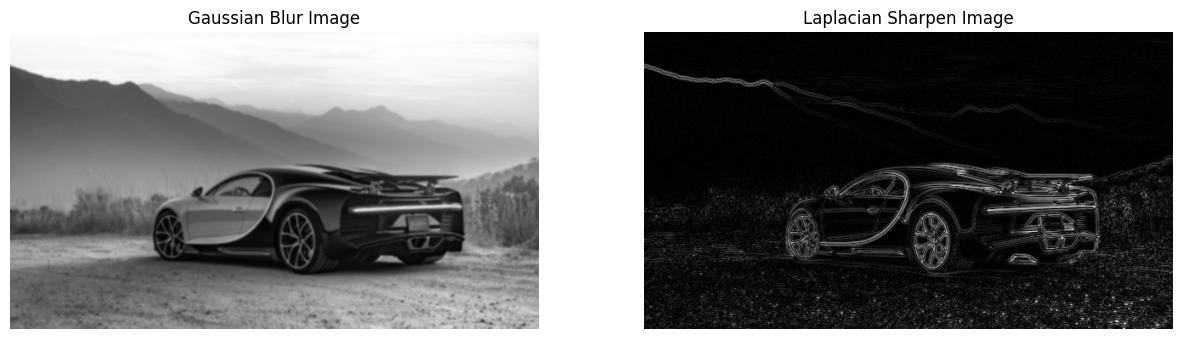

In [24]:
def imageSharpeningWithLaplacian(img):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gausianBlur = cv.GaussianBlur(img,(7,7),1)
    
    laplacian = cv.Laplacian(gausianBlur, cv.CV_16S, ksize=3)
    laplacianSharpen = cv.convertScaleAbs(laplacian)

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(gausianBlur,cmap="gray")
    plt.axis("off")
    plt.title("Gaussian Blur Image")

    plt.subplot(1,2,2)
    plt.imshow(laplacianSharpen,cmap="gray")
    plt.axis("off")
    plt.title("Laplacian Sharpen Image")
imageSharpeningWithLaplacian("Chiron.jpeg")
    
    

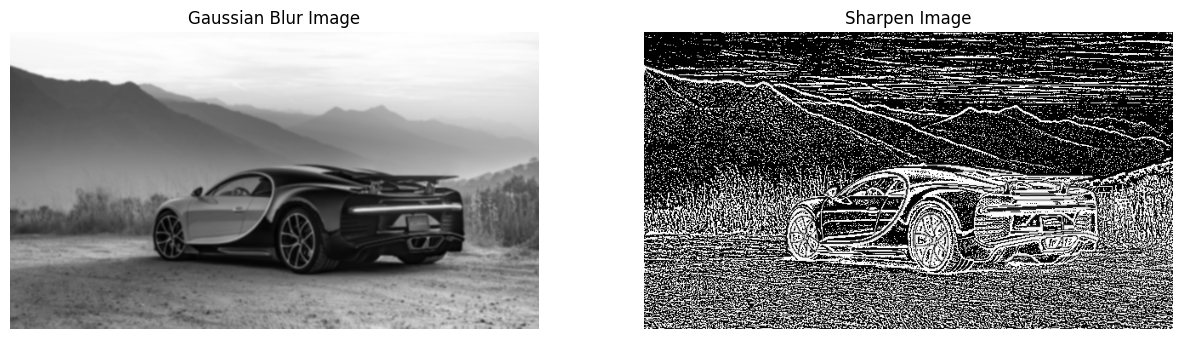

In [25]:
def unsharpMasking(img,gausianBlur):
    sharpenImg = np.zeros_like(img,dtype="uint8")
    height,width = sharpenImg.shape[:2]

    for i in range(height):
        for j in range(width):
            sharpenImg[i,j] = img[i,j] - gausianBlur[i,j]
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(gausianBlur,cmap="gray")
    plt.axis("off")
    plt.title("Gaussian Blur Image")

    plt.subplot(1,2,2)
    plt.imshow(sharpenImg,cmap="gray")
    plt.axis("off")
    plt.title("Sharpen Image")
    


img = cv.imread("Chiron.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gausianBlur = cv.GaussianBlur(img,(9,9),1)

unsharpMasking(img, gausianBlur)

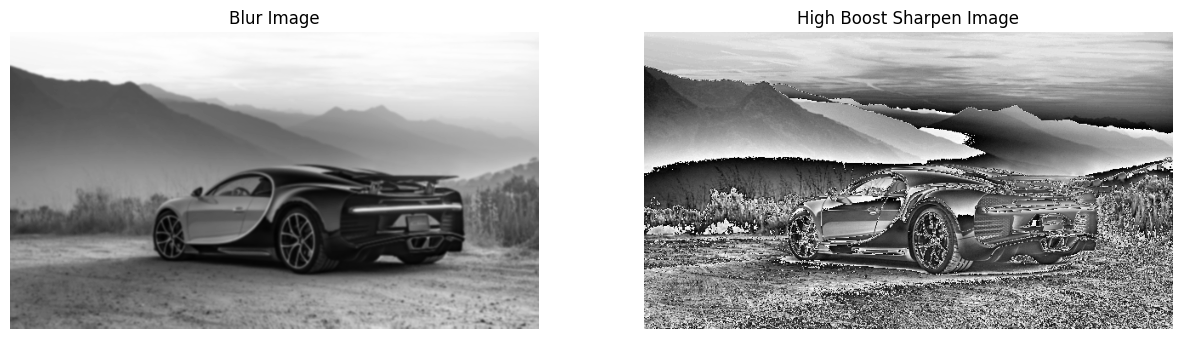

In [26]:
def highBoostFiltering(img, blur):
    highBoostImg = np.zeros_like(img,dtype="uint8")
    height,width = highBoostImg.shape[:2]
    A = 5
    for i in range(height):
        for j in range(width):
            highBoostImg[i,j] = (A*img[i,j]) - blur[i,j]
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(blur,cmap="gray")
    plt.axis("off")
    plt.title("Blur Image")

    plt.subplot(1,2,2)
    plt.imshow(highBoostImg,cmap="gray")
    plt.axis("off")
    plt.title("High Boost Sharpen Image")
    
    

img = cv.imread("Chiron.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gausianBlur = cv.GaussianBlur(img,(9,9),1)
highBoostFiltering(img,gausianBlur)

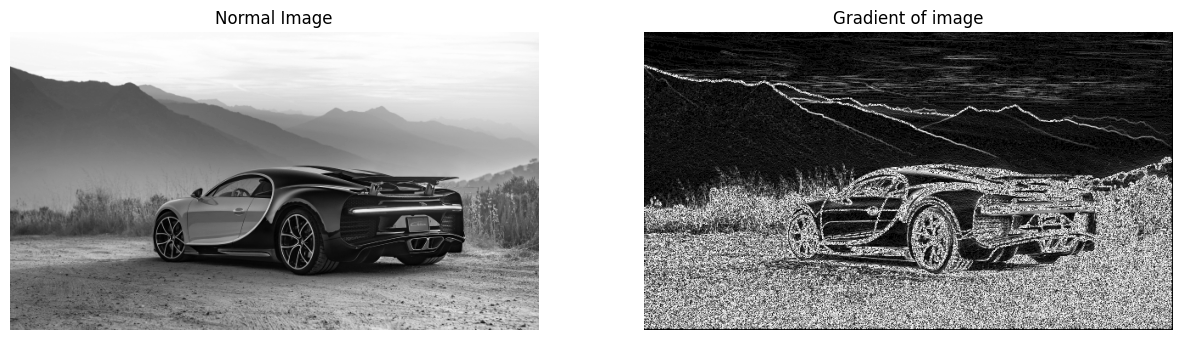

In [27]:
def imageGradient(img):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    paddedImg = cv.copyMakeBorder(img,1,1,1,1,cv.BORDER_REFLECT)
    height,width = paddedImg.shape[:2]

    firstDerivativeX = np.zeros_like(paddedImg,dtype="uint8") 
    for i in range(height-1):
        for j in range(width-1):
            firstDerivativeX[i,j] = paddedImg[i,j+1] - paddedImg[i,j]
    
    firstDerivativeY = np.zeros_like(paddedImg,dtype="uint8")
    for i in range(height-1):
        for j in range(width-1):
            firstDerivativeY[i,j] = paddedImg[i+1,j] - paddedImg[i,j]


    gradient = np.zeros_like(paddedImg,dtype="uint8")
    for i in range(height-1):
        for j in range(width-1):
            gradient[i,j] = np.sqrt(np.square(firstDerivativeX[i,j])+ np.square(firstDerivativeY[i,j])) 
            
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title("Normal Image")

    plt.subplot(1,2,2)
    plt.imshow(gradient,cmap="gray")
    plt.axis("off")
    plt.title("Gradient of image")

imageGradient("Chiron.jpeg")
    
    
    